<a href="https://colab.research.google.com/github/TomisinT99/boston-housing-analysis/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reading of csv file
import pandas as pd
import numpy as np
#Loading and indexing the dataset
boston= pd.read_csv('BostonHousing.csv')
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=e5ece2b30b32ffa3df57db1e671bb21ce77ddb19de15bb52feae4e1f9a411ef4
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean

# Initializing Spark Session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()

# 1. Load the dataset from csv file
df = spark.read.csv("/content/BostonHousing.csv", sep=",", header = True, inferSchema=True)

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Specifying input columns (all except 'medv')
input_cols = [col for col in df.columns if col != 'medv']

# Initialize VectorAssembler
assembler = VectorAssembler(inputCols=input_cols, outputCol='features')

# Transform the DataFrame
output = assembler.transform(df)

# Show the transformed DataFrame
output.select('features').show(truncate=False)


+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]     |
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14]    |
|[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]   |
|[0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94]   |
|[0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33]    |
|[0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21]    |
|[0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.6,12.43]  |
|[0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.9,19.15]  |
|[0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93]|
|[0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,

In [ ]:
from pyspark.ml.feature import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=True)

# Fit and transform the DataFrame
scaled_output = scaler.fit(output).transform(output)

# Show the scaled features
scaled_output.select('scaled_features').show(truncate=False)


+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                                                                                                                                                          |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[-0.4193669292132157,0.28454826934046545,-1.2866362317171998,-0.2723290676792085,-0.14407485473245793,0.4132629204530851,-0.11989476721580969,0.1400749839795616,-0.9818711878618682,-0.66594917948

In [ ]:
from pyspark.ml.feature import PCA

# Initialize PCA
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')

# Fit the model
pca_model = pca.fit(scaled_output)

# Apply the model to transform the data
pca_result = pca_model.transform(scaled_output)

# Show PCA results
pca_result.select('pca_features').show(truncate=False)


+-------------------------------------------+
|pca_features                               |
+-------------------------------------------+
|[2.096223030238583,0.7723484263420728]     |
|[1.4558109894474212,0.5913999518264818]    |
|[2.0725465519481854,0.5990465781004481]    |
|[2.6089217588643487,-0.0068638262975736246]|
|[2.4557547719310775,0.09761534604617053]   |
|[2.2126618431927714,-0.009477632593783855] |
|[1.35753765586535,0.34952629171413435]     |
|[0.8412121417133108,0.5772284930996238]    |
|[0.1797503956482866,0.3421795279689564]    |
|[1.0731221380356935,0.3158888209594483]    |
|[0.9085124527199482,0.507249715066528]     |
|[1.2424255472222598,0.41269090875213493]   |
|[1.4614510493263662,-0.012006699444729275] |
|[0.7350469457293151,-0.12716913436301377]  |
|[0.35966159252452445,0.13115034693282498]  |
|[0.7193471910955812,-0.1811649215724927]   |
|[1.099688318376697,-0.48003918978948595]   |
|[0.1505639748370785,0.0777346044402311]    |
|[0.350220266837993,-0.68423835678

In [ ]:
import numpy as np
import pandas as pd

# Collect PCA results and flatten the array
pca_array = np.array(pca_result.select('pca_features').rdd.flatMap(lambda x: x).collect())

# Reshape the array to 2D
pca_array = pca_array.reshape(-1, 2) # -1 infers the number of rows based on the number of columns (2)

# Convert numpy array to Pandas DataFrame
pca_df = pd.DataFrame(pca_array, columns=['PCA1', 'PCA2'])

# Display the Pandas DataFrame
print(pca_df.head())

       PCA1      PCA2
0  2.096223  0.772348
1  1.455811  0.591400
2  2.072547  0.599047
3  2.608922 -0.006864
4  2.455755  0.097615


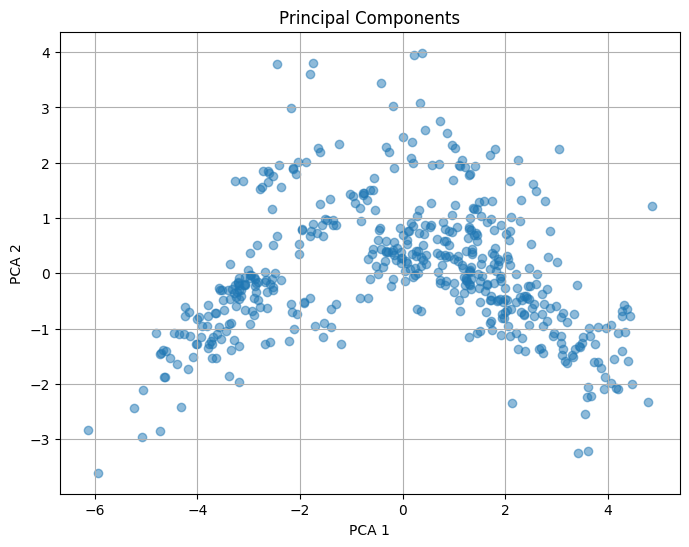

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.title('Principal Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


In [ ]:
assembler_full = VectorAssembler(inputCols=['scaled_features', 'medv'], outputCol='features_full')

# Transform the DataFrame
data_full = assembler_full.transform(scaled_output)

# Show the transformed DataFrame
data_full.select('features_full').show(truncate=False)


+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_full                                                                                                                                                                                                                                                                 |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[-0.4193669292132157,0.28454826934046545,-1.2866362317171998,-0.2723290676792085,-0.14407485473245793,0.4132629204530851,-0.11989476721580969,0.1400749839795616,-0.9818711878618682

In [ ]:
# Split the data into training and testing sets (70% train, 30% test)
train_data, test_data = data_full.randomSplit([0.7, 0.3], seed=123)

# Print the number of rows in each dataset
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))


Training Dataset Count: 354
Test Dataset Count: 152


In [ ]:
from pyspark.ml.regression import LinearRegression

# Initialize LinearRegression
lr = LinearRegression(featuresCol='features_full', labelCol='medv')

# Fit the model
lr_model = lr.fit(train_data)

# Print coefficients and intercept
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))


Coefficients: [-7.329109421491956e-16,-3.563388869059338e-15,-8.542526937222714e-15,-2.306410922077514e-15,7.051063153785144e-15,-1.0590025347931909e-14,7.61043310649442e-16,5.7679944655891506e-15,-2.53118647784953e-14,2.669369848632033e-14,1.0209900274777225e-14,-7.0986416825661e-15,1.513555017785829e-14,1.0000000000000042]
Intercept: -9.592753058321917e-14


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Make predictions on test data
predictions = lr_model.transform(test_data)

# Select example rows to display
predictions.select("prediction", "medv", "features_full").show(5)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


+------------------+----+--------------------+
|        prediction|medv|       features_full|
+------------------+----+--------------------+
| 21.99999999999998|22.0|[-0.4188274912467...|
|50.000000000000036|50.0|[-0.4184961554268...|
| 24.49999999999998|24.5|[-0.4183566456079...|
| 30.09999999999999|30.1|[-0.4181148285884...|
| 32.90000000000002|32.9|[-0.4180346104426...|
+------------------+----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 2.08345e-14


In [ ]:
# Coefficients and Intercept
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))

# Feature Importance or Statistical Significance Analysis
# Example: Print feature names and corresponding coefficients
feature_names = input_cols + ['PCA1', 'PCA2']
coefficients = lr_model.coefficients
coefficients_with_names = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)
for coef, feat in coefficients_with_names:
    print(f"{feat}: {coef}")


Coefficients: [-7.329109421491956e-16,-3.563388869059338e-15,-8.542526937222714e-15,-2.306410922077514e-15,7.051063153785144e-15,-1.0590025347931909e-14,7.61043310649442e-16,5.7679944655891506e-15,-2.53118647784953e-14,2.669369848632033e-14,1.0209900274777225e-14,-7.0986416825661e-15,1.513555017785829e-14,1.0000000000000042]
Intercept: -9.592753058321917e-14
PCA1: 1.0000000000000042
tax: 2.669369848632033e-14
rad: -2.53118647784953e-14
lstat: 1.513555017785829e-14
rm: -1.0590025347931909e-14
ptratio: 1.0209900274777225e-14
indus: -8.542526937222714e-15
b: -7.0986416825661e-15
nox: 7.051063153785144e-15
dis: 5.7679944655891506e-15
zn: -3.563388869059338e-15
chas: -2.306410922077514e-15
age: 7.61043310649442e-16
crim: -7.329109421491956e-16
